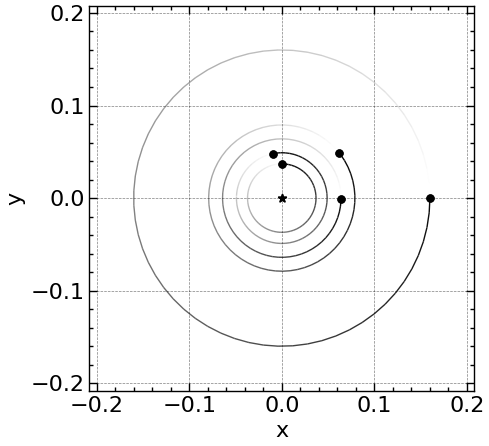

In [13]:
import rebound
%matplotlib inline

sim = rebound.Simulation()
sim.add(m=0.73)
sim.add(m=1.85e-5, a=0.037, M=95.8)
sim.add(m=1.645e-5, a=0.049, M=171.41)
sim.add(m=1.686e-5, a=0.064, M=289.01)
sim.add(m=2.591e-5, a=0.079, M=132.61)
sim.add(m=3.290e-6, a=0.16)

sim.move_to_com()
fig = rebound.OrbitPlot(sim)

In [12]:
rebound.Orbit?

Init signature: rebound.Orbit(self, /, *args, **kwargs)
Docstring:     
A class containing orbital parameters for a particle.
This is an abstraction of the reb_orbit data structure in C.

When using the various REBOUND functions using Orbits, all angles are in radians. 
The following image illustrated the most important angles used.
In REBOUND the reference direction is the positive x direction, the reference plane
is the xy plane.

.. image:: images/orbit.png
   :width: 500px
   :height: 450px

Image from wikipedia. CC-BY-SA-3.

Attributes
----------
d       : float           
    radial distance from reference 
v       : float         
    velocity relative to central object's velocity
h       : float           
    specific angular momentum
P       : float           
    orbital period (negative if hyperbolic)
n       : float           
    mean motion    (negative if hyperbolic)
a       : float           
    semimajor axis
e       : float           
    eccentricity
inc     : floa

In [14]:
from spock import FeatureClassifier
model = FeatureClassifier()

[15:17:20] WARNING: ../src/learner.cc:749: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.


In [15]:
%%time
model.predict_stable(sim)

CPU times: user 589 ms, sys: 8.17 ms, total: 598 ms
Wall time: 440 ms


0.6125783

In [16]:
model.generate_features(sim)

([OrderedDict([('EMcrossnear', 0.30612244897959295),
               ('EMfracstdnear', 0.020570749747591426),
               ('EPstdnear', 0.0005301286999599997),
               ('MMRstrengthnear', 0.17463580235195864),
               ('EMcrossfar', 0.32432432432432445),
               ('EMfracstdfar', 0.011340134314747688),
               ('EPstdfar', 0.0014139018902047),
               ('MMRstrengthfar', 0.034926856616696124),
               ('MEGNO', 2.008631220649641),
               ('MEGNOstd', 0.0018999344374309843)]),
  OrderedDict([('EMcrossnear', 0.23437499999999892),
               ('EMfracstdnear', 0.014570840498901033),
               ('EPstdnear', 0.0011959820450120077),
               ('MMRstrengthnear', 0.01758510794217923),
               ('EMcrossfar', 0.30612244897959295),
               ('EMfracstdfar', 0.020570749747591426),
               ('EPstdfar', 0.0005301286999599997),
               ('MMRstrengthfar', 0.17463580235195864),
               ('MEGNO', 2.00863122

In [17]:
from spock import DeepRegressor
deepmodel = DeepRegressor()

In [18]:
%%time
median, lower, upper, samples = deepmodel.predict_instability_time(sim, return_samples=True)

CPU times: user 37 s, sys: 11.5 s, total: 48.4 s
Wall time: 8.29 s


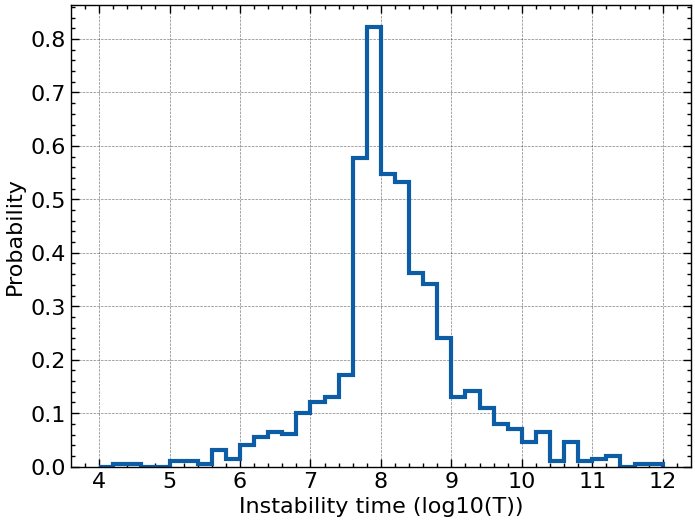

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
%matplotlib inline

fig, ax = plt.subplots()
ax.hist(np.log10(samples), density=True,
            histtype=u'step', bins=40,
            range=(4, 12), lw=3);

plt.ylabel('Probability')
plt.xlabel('Instability time (log10(T))')
plt.show()

In [20]:
print("Median instability time = {0:.3e} orbits\n16th percentile instability time = {1:.3e} orbits\n84th percentile instability time = {2:.3e} orbits".format(median, lower, upper))

Median instability time = 1.252e+08 orbits
16th percentile instability time = 3.824e+07 orbits
84th percentile instability time = 9.037e+08 orbits


In [21]:
from spock import AnalyticalClassifier
analyticalmodel = AnalyticalClassifier()

In [22]:
%%time
prob = analyticalmodel.predict_stable(sim)
print("Probability of regular (non-chaotic) motion: {0:.2f}".format(prob))

Probability of regular (non-chaotic) motion: 0.95
CPU times: user 2.94 s, sys: 10 ms, total: 2.95 s
Wall time: 2.95 s
